In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the Titanic dataset
url = '/content/Titanic-Dataset.csv'
titanic_df = pd.read_csv(url)

In [ ]:
# Data Cleaning

print(titanic_df.info())
print(titanic_df.describe())
print(titanic_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# 2. Handle missing data

# Fill missing 'Age' with the median age
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [ ]:
# Drop 'Cabin' due to many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Fill missing 'Embarked' values with the most common value (mode)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [ ]:
# 3. Convert categorical variables to numerical (for analysis purposes)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

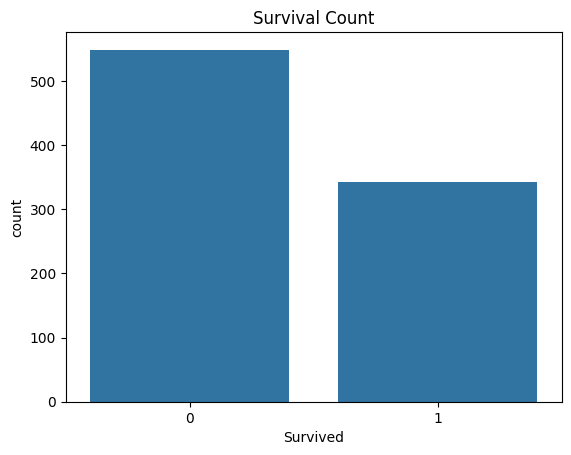

In [ ]:
# Survived
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

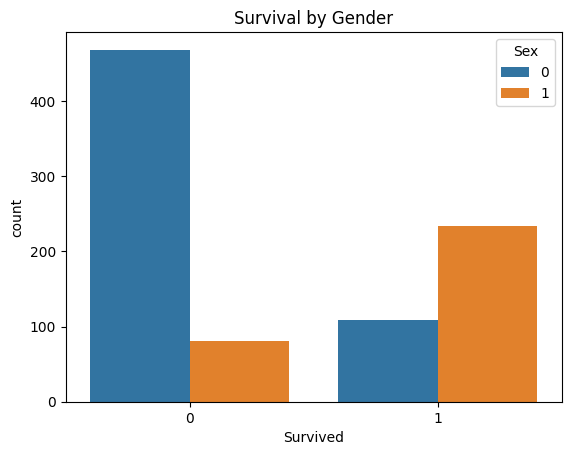

In [ ]:
# Gender distribution among survivors
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival by Gender')
plt.show()

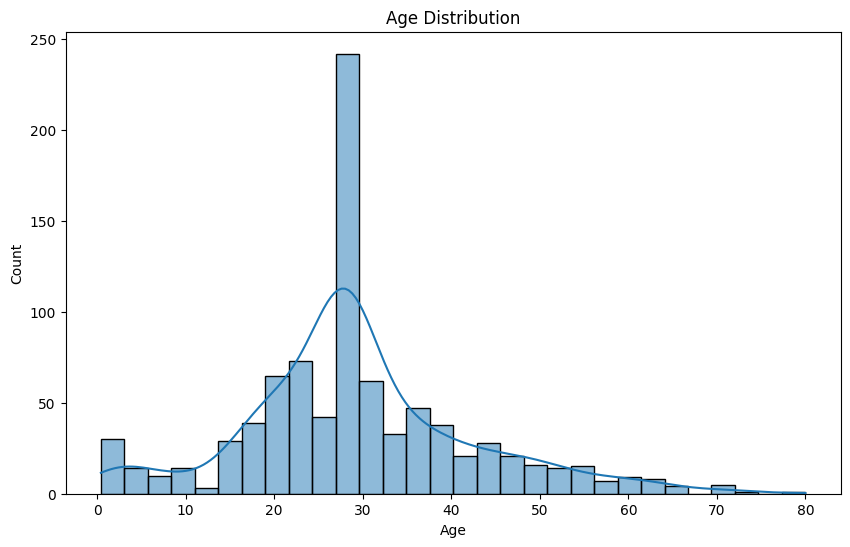

In [ ]:
# 2. Age distribution
plt.figure(figsize=(10,6))
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

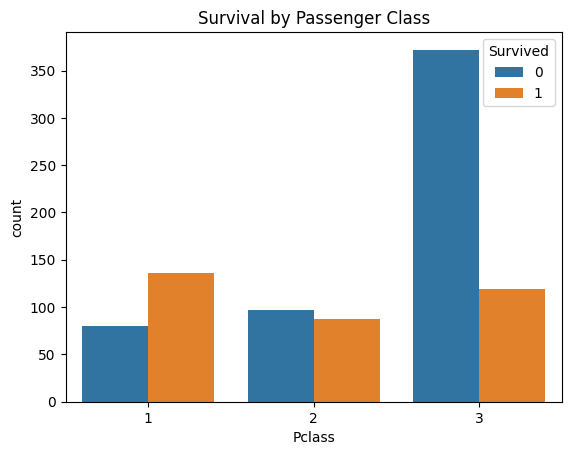

In [ ]:
# 3. Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

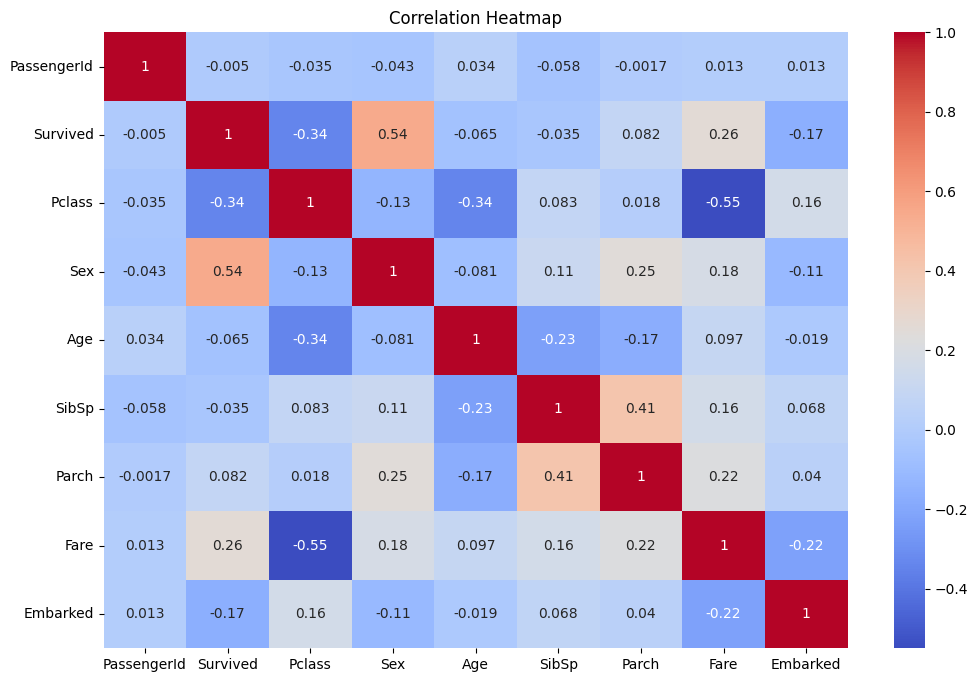

In [ ]:
numeric_cols = titanic_df.select_dtypes(include=[np.number])  # Select only numeric columns

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

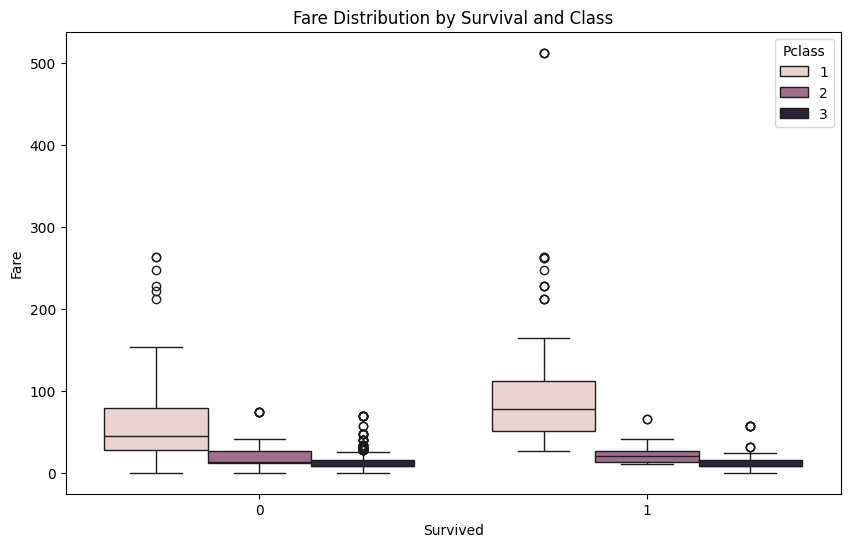

In [ ]:
# 5. Boxplot of Fare by Survival and Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', hue='Pclass', data=titanic_df)
plt.title('Fare Distribution by Survival and Class')
plt.show()

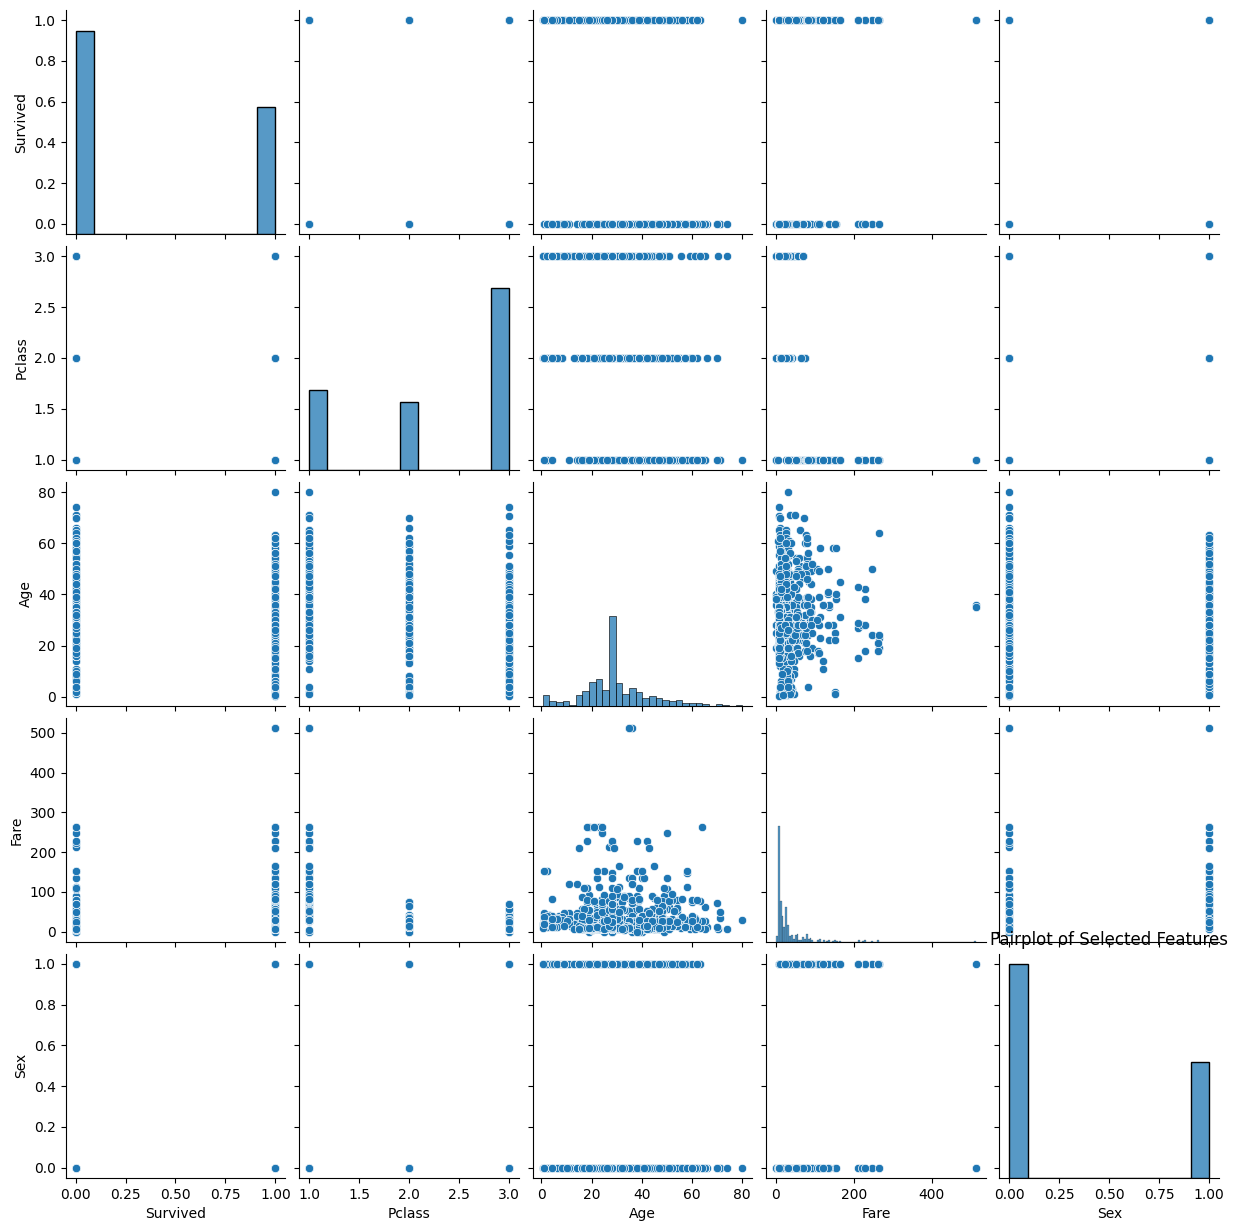

In [ ]:
# 6. Pairplot for selected features
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']])
plt.title('Pairplot of Selected Features')
plt.show()